**Day 4**: Deep-Dive into Data Modelling 🤿 (***live in 1.47***)

<center><h1 style="color:maroon">A Deep Dive into Data Modelling</h1>
    <img src="https://drive.google.com/uc?id=13LVZytG5rHMu0t9swAkqlbwKzzczGWmm" style="width:1300px">
    <h3><span style="color: #045F5F">Data Science & Machine Learning for Planet Earth Lecture Series</span></h3><h6><i> by Cédric M. John <span style="size:6pts">(2023)</span></i></h6></center>

## Plan for today's Lecture 🗓 

* No Free Lunch Theorem
* Dealing wiht Spatial and temporal covariance
* Feature Selection 

## Intended learning outcomes 👩‍🎓

* Use a learning curve to assess the training of your algorithm
* Be able to choose the correct train-test split method
* Handling non-stationarity for machine learning modelling
* Be able to select the best features for your model

# Classification Dataset
**<span style="color:teal">Dataset for classification today:</span>** <a href="https://archive.ics.uci.edu/ml/datasets/wine">UCI Wine Dataset</a><br>
<img src="https://drive.google.com/uc?id=12wkCgxubcJY2oFy-RvljDCnIBBvrX3Wu" width="800"/>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

def split_and_scale(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=42)

    scaler = StandardScaler().fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

    return X_train, X_test, y_train, y_test

def prep_classification():
    data = pd.read_csv('Lecture_data/wines_binary.csv')
    
    X=data.drop(columns=['is_good_quality'])
    y=data.is_good_quality
    
    return split_and_scale(X, y)

# "No Free Lunch" Theorem
<br>

<center><img src="https://drive.google.com/uc?id=134yepoqE1oeugxz81m0Q7ZEa_-ZycQvu" style="width:900px;"><br>
 © Cédric John, 2022; Image generated with <a href="https://openai.com/blog/dall-e/">DALL-E</a>
<br>Prompt: Photo of a beautifully colored greek lunch with olives, mousaka and various other elements set on a white and blue checkered table cloth, sunny bright lighting.</center>

#  Bias vs Variance 
<img src="https://drive.google.com/uc?id=13aE9Z_4rNb9KCckNrU81x6CtXODLJmee" style="width:900px;"><br>
<a href="http://scott.fortmann-roe.com/docs/BiasVariance.html">Scott-Fortmann, 2012</a><br>

# The Bias / Variance tradeoff
For a model to generalize there will be a tradeoff between **bias** and **variance**.
<img src="https://drive.google.com/uc?id=12x_SMJXidtd-0-3-jpaPrAxGRrclCbyg" style="width:1300px"><br>
<a href="https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229">Singh, 2018</a><br>

* **Bias (Underfitting)**: The inability for an algorithm to learn the patterns within a dataset.
* **Variance (Overfitting)**: The algorithm generates an overly complex relationship when modelling patterns within a dataset.

## No Free Lunch Theorem

Some models **oversimplify**, while others **overcomplicate** a relationship between features and target.<br>

It's up to us data scientists to make **assumptions** about the data and evaluate reasonable models accordingly.<br>

**There is no one size fits all model**, this is known as the **No Free Lunch Theorem**.

## The Learning Curves
We can use learning curves to diagnose three aspects of model behaviour on the dataset:
* Underfitting
* Overfitting
* Whether the model has sufficient data to learn the patterns of the dataset


### Concept
Increasing the size of the training set can affect the training and validation scores.
<img src="https://drive.google.com/uc?id=13dPV7OpIxKD5wP_L9FRx6vSDLw4c6YMO" style="width:900px;"><br>
<p><a href="https://www.dataquest.io/blog/learning-curves-machine-learning/">Olteanu, 2018</a></p>


### Reading  the curves
As the training size increases:
* The training score will decrease
* The testing score will increase
* The curves typically (but not always!) demonstrate convergence
<img src="https://drive.google.com/uc?id=12ykMUpomQ6sVZ1T-aw8xoDLh529RxW5i" style="width:900px;"><br>
<p><a href="https://www.dataquest.io/blog/learning-curves-machine-learning/">Olteanu, 2018</a></p>

# Bulding a learning Curve

Let's build a learning curve for our wine dataset. First, we create a categorical data and split our dataset.

In [2]:
X_train, X_test, y_train_cat, y_test_cat = prep_classification()

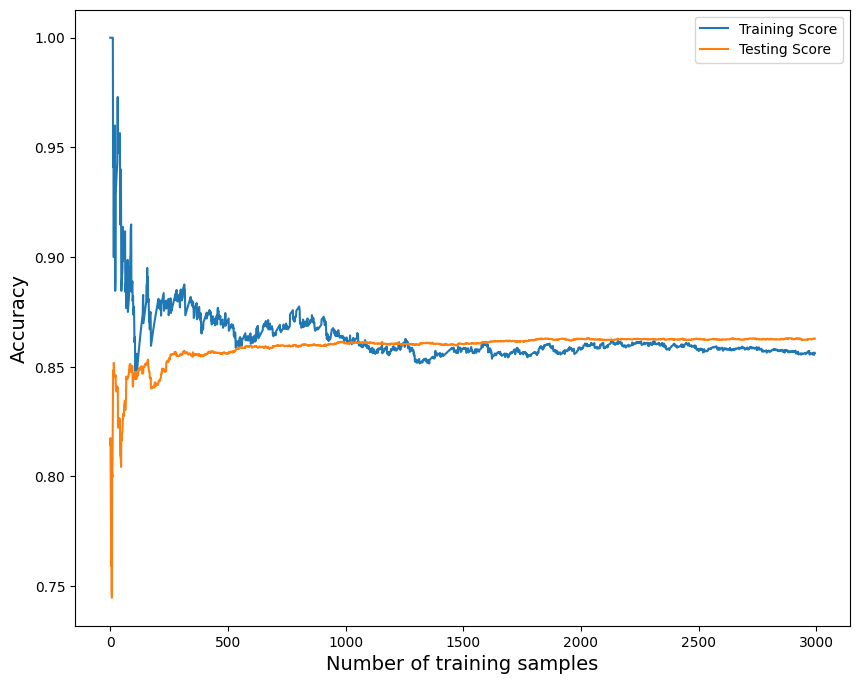

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

val_score = []
train_score = []

fig, ax = plt.subplots(1,1, figsize=(10,8))
for nb_samples in range(5,3000):
    Xi = X_train[:nb_samples]
    yi = y_train_cat[:nb_samples]
    lr = LogisticRegression().fit(Xi, yi)
    y_pred = lr.predict(Xi)
    y_test_pred = lr.predict(X_test)

    train_score.append(accuracy_score(yi, y_pred))
    val_score.append(accuracy_score(y_test_cat, y_test_pred))

ax.plot(train_score, label='Training Score')
ax.plot(val_score, label='Testing Score')
ax.set_xlabel('Number of training samples', size = 14)
ax.set_ylabel('Accuracy', size = 14)
ax.legend();
    


<h3 id="The-Bias-Variance-Tradeoff">The Bias-Variance Tradeoff</a></h3><p>One of the most important concepts in Data science!</p>


 Measuring the error on an unseen **Test set**:<br>
<img src="https://drive.google.com/uc?id=134TQ0Cb72pBha1I6kqxab8Z61ITvCRb_" style="width:1300px;">
$$\text{Total Error} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}$$
📚 <a href="https://hastie.su.domains/ElemStatLearn/">Hastie et al, 2009 (Elements of Statistical Learning)</a>

Best model complexity is the one reducing the **Total Error** on a unseen dataset
<img src="https://drive.google.com/uc?id=12yh6UD5cxqT16pIPbO6amTzfhUp8RI5u" style="width:1300px;">
📚 <a href="https://hastie.su.domains/ElemStatLearn/">Hastie et al, 2009 (Elements of Statistical Learning)</a>

# We have learned to save a test set

✂️ On Monday, we learned to split the dataset to insure our trained machine learning model **extrapolates** well to unknown samples (i.e. we can test the results on the 'test set')


⭐ Today, we will refine this notion by adding two important considerations:

1. We will explain the use of a **validation** vs a **test set**

2. We will see when **NOT** to split randomly

# Train-Validation-Test sets

* When we model data, we need to make many decisions (what model to use, what hyperparameter to choose, what features to keep or remove)

* If we use the **test set** to make these decision, we effectively have to way to assess the error of our final model (we **leak** statistic from the test set during our training process)

* The right practice is to extract a *Validation Set* from our train set

<p><img src="https://drive.google.com/uc?id=135MTNG_LIJpBlZIIn0GogOJ8IiBw9wGz"></p>

# Temporal and Spatial colinearity
<br>

<center><img src="https://drive.google.com/uc?id=134scR_-A91h8PMramnv-rZhlcJfrj7yL" style="width:900px;"><br>
 © Cédric John, 2022; Image generated with <a href="https://openai.com/blog/dall-e/">DALL-E</a>
<br>Prompt: An oil painting of a pocket watch in dramatic green lighting, digital art.</center>

### Dataset

<img src="https://drive.google.com/uc?id=13edDxWekC4jbRAkZq5-iODykRRRZSO3g" style="padding:10px;width:500px;" align="left"/>

<span style="color:teal">**Porosity Dataset:** </span> To demonstrate the concept of spatial colinearity, we will be playing with a geographic distribution of porosity. I borrowed this dataset from my colleague <a href="https://github.com/GeostatsGuy/PythonNumericalDemos"> Prof. Michael Pyrcz on GitHub.</a> This is an ideal dataset for this as it contains data spread geographically.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Lecture_data/poro-perm.csv")  
data

,X,Y,Facies,Porosity,Perm,AI
0,100.0,900.0,1.0,0.100187,1.363890,5110.699751
1,100.0,800.0,0.0,0.107947,12.576845,4671.458560
2,100.0,700.0,0.0,0.085357,5.984520,6127.548006
3,100.0,600.0,0.0,0.108460,2.446678,5201.637996
4,100.0,500.0,0.0,0.102468,1.952264,3835.270322
...,...,...,...,...,...,...
256,780.0,669.0,1.0,0.175642,629.138468,3140.692477
257,50.0,779.0,1.0,0.091725,0.656564,6197.834381
258,430.0,589.0,1.0,0.139057,13.124324,3981.017070
259,130.0,489.0,0.0,0.099351,8.681915,4954.088777


#### Limiting ourselves to sand data

To simplify this example, we will only look at the sandy lithologies:

In [5]:
sand = data[data.Facies==1]
shale = data[data.Facies==0]

In [6]:
x = sand.X.values
y = sand.Y.values
phi = sand.Porosity.values

# Geospatial Colinearity

#### Let's plot the spatial variability of porosity

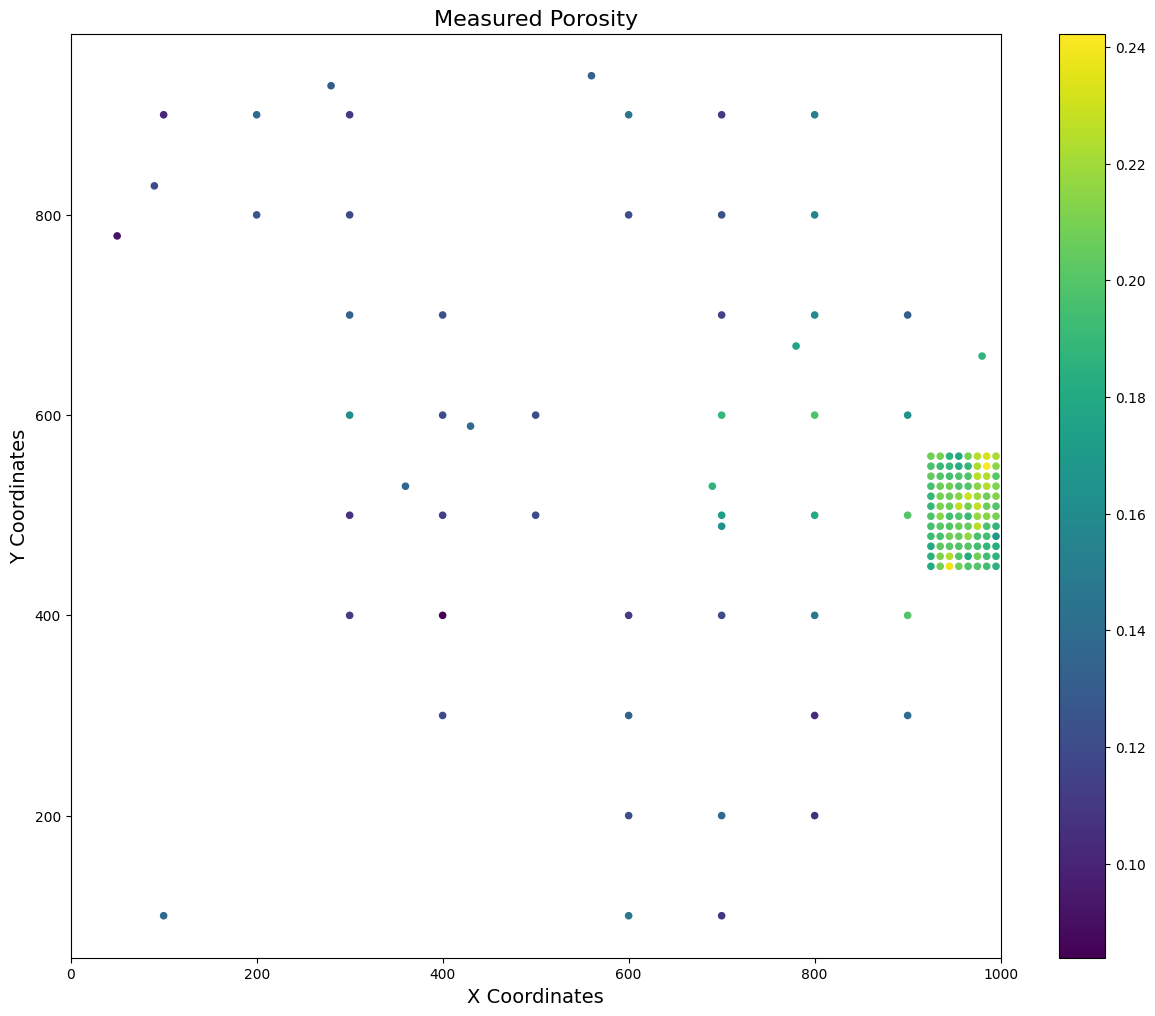

In [8]:
fig, ax = plt.subplots(1,1, figsize=(15,12))
sc = ax.scatter(x, y, c=phi,s=20);ax.set_title('Measured Porosity', size=16)
ax.set_xlabel('X Coordinates', size=14);ax.set_ylabel('Y Coordinates', size=14)
plt.colorbar(sc);ax.set_xlim(0,1000);

## Exploring relationship to distance

Let's extract all datapoints from the previous graph that are between 400 and 600 units on the <code>Y</code> axis, and average their values by their position on <code>X</code>. We will also normalize <code>X</code> (distance) and <code>Porosity</code> for easier plotting on the next slide.

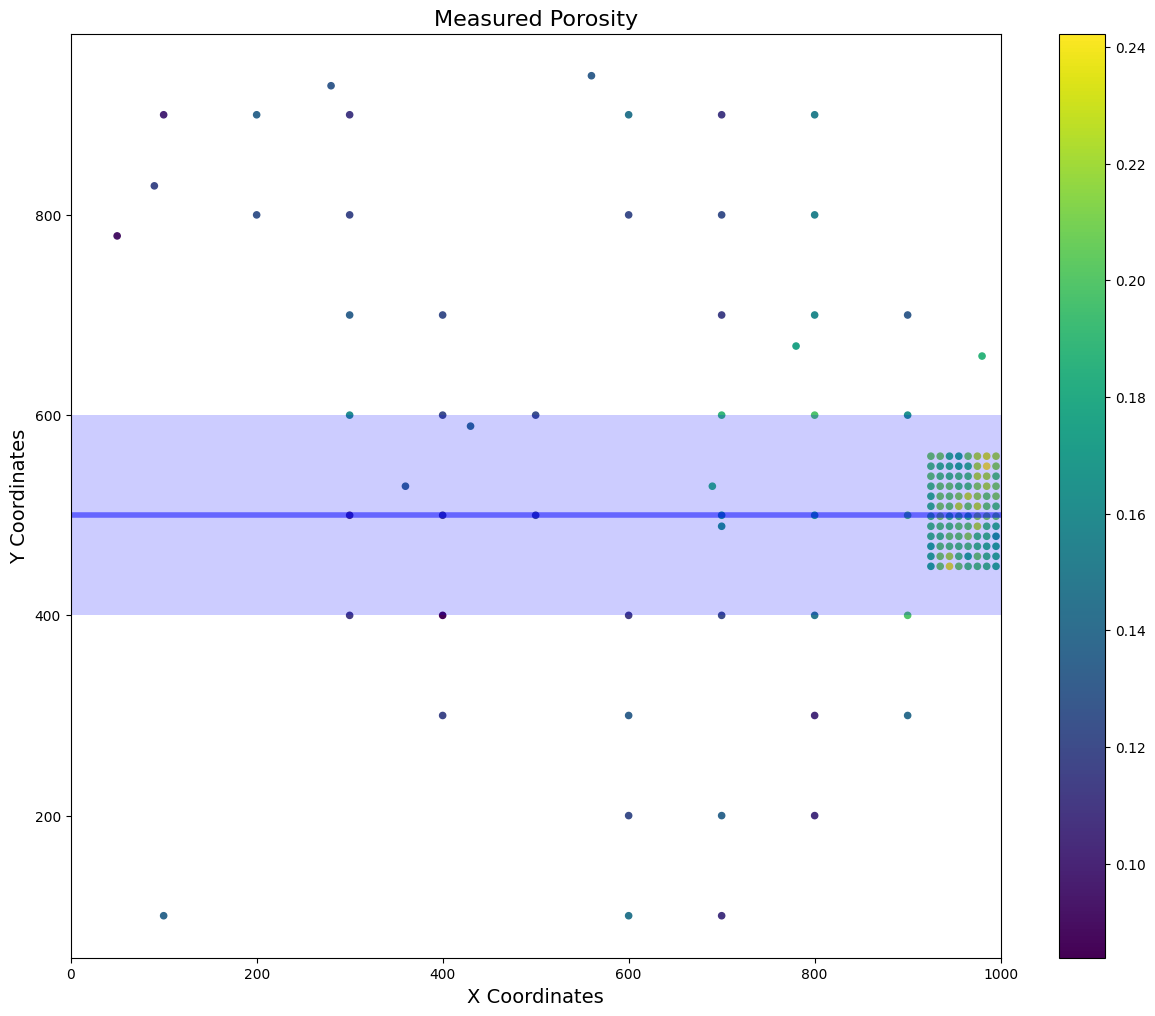

In [9]:
import matplotlib.patches as patches
fig, ax = plt.subplots(1,1, figsize=(15,12))
sc = ax.scatter(x, y, c=phi,s=20);ax.set_title('Measured Porosity', size=16)
ax.set_xlabel('X Coordinates', size=14);ax.set_ylabel('Y Coordinates', size=14)
rect = patches.Rectangle((0, 400), 1000, 200, linewidth=0, edgecolor='r', facecolor='blue', alpha=.2)
ax.plot([0,1000],[500,500],c='blue', linewidth=4, alpha=.5)
ax.add_patch(rect); plt.colorbar(sc);ax.set_xlim(0,1000);

In [10]:
from sklearn.preprocessing import MinMaxScaler

corr_df = sand[(sand.Y>400) & (sand.Y<600)][['X','Porosity', 'Perm']]
corr_df = corr_df.groupby('X').mean().reset_index()

corr_df = pd.DataFrame(MinMaxScaler().fit_transform(corr_df).T, corr_df.columns).T
corr_df

,X,Porosity,Perm
0,0.000000,0.000000,0.018477
1,0.085106,0.260923,0.017756
2,0.141844,0.063252,0.234585
3,0.184397,0.297105,0.018155
4,0.283688,0.118158,0.000000
5,0.553191,0.741415,0.570656
6,0.567376,0.565825,0.879767
7,0.709220,0.673491,0.502506
8,0.851064,0.861128,0.152270
9,0.886525,0.798359,0.599541


### Let's plot the relationship between <code>Porosity</code> and <code>distance</code> on the X axis:

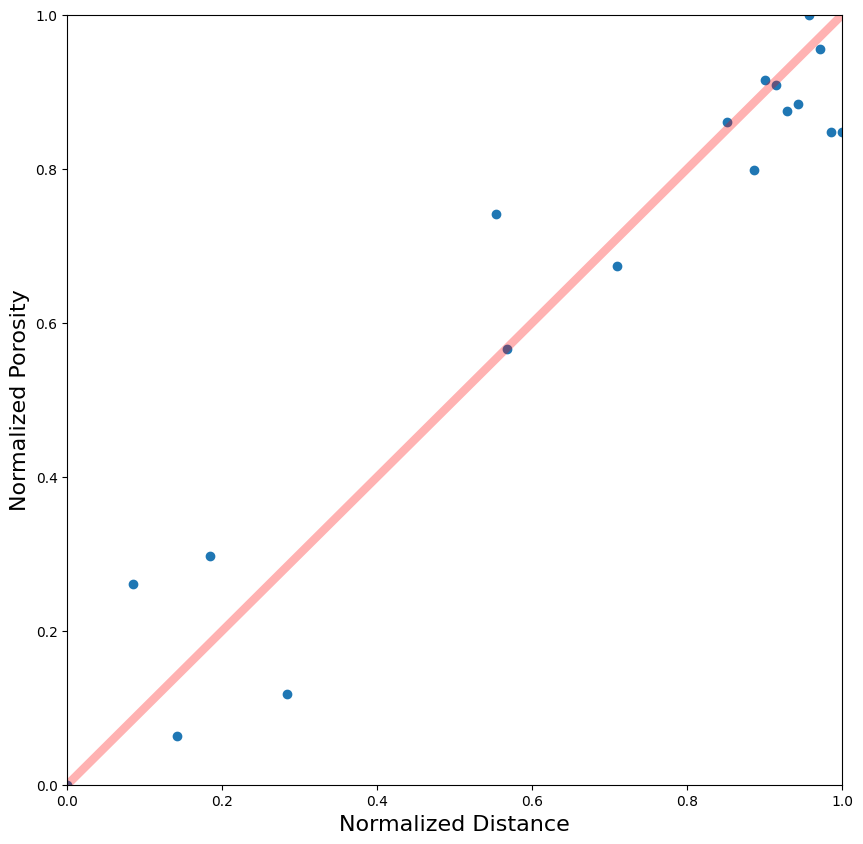

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ool = np.linspace(0,1,10)
ax.scatter(corr_df.X, corr_df.Porosity);ax.plot(ool,ool,c='red', linewidth=6.0, alpha=.3);
ax.set_xlabel("Normalized Distance", size=16);ax.set_ylabel("Normalized Porosity", size=16);
ax.set_xlim(0,1); ax.set_ylim(0,1);

❗ There is clearly a correlation between geographic position and values of porosity! This means that we have **spatial colinearity** (porosity is more closely related to points that are nearer to each other than far away).

* 🎲 For data with spatial or temporal co-linearity, if we do a **random split** we will end up with data in our test set that is very similar (has strong autocorrelation) to data in our train set

* 👎 This breaks our assumption of independance of training and testing set: our assessment of the performance of our machine learning algorithm will be unrealistically high.

## Geographic train-test split

Often, for spatial data, the solution is to split the training and testing set based on location. This is also applicable to 1D (e.g. cores, logs) and 3D (e.g. seismic, atmospheric volume, oceans, ...) datasets. Hence, rather than take the approach shown on the right below we take the approach taken on the left:

<img src="https://drive.google.com/uc?id=13dsf6Gbo3x-48iwQxILbBXdflXc3Ps3m" style="width:1500px">
<a href="https://en.wikipedia.org/wiki/Machine_learning_in_earth_sciences">Wikipedia</a>

👆 This only works if the data distribution in the training set is similar to the data distribution in the test set. In other words, if the data is stationary (see below).

## Is cross-validation possible for spatial/temporal data?

<img src="https://drive.google.com/uc?id=13PaANdafySdobAwVuFnh4za7T_GBb3PZ" style="width:800">
<a href="https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/">Brownlee, 2016</a>

# Predefined Splits

We can do cross-validation with predefined splits:

In [12]:
from sklearn.model_selection import PredefinedSplit, cross_validate

folds = []

for i in range(3): # df_corr has 18 values so I am creating 18 folds values
    folds= folds + [0,0] # Will be test set for fold 0
    folds= folds + [1,1] # Will be test set for fold 1
    folds= folds + [-1,-1] # Will always be in the train set (never test)
    
ps = PredefinedSplit(test_fold=np.array(folds).reshape(-1,1))
folds

[0, 0, 1, 1, -1, -1, 0, 0, 1, 1, -1, -1, 0, 0, 1, 1, -1, -1]

In [13]:
ps

PredefinedSplit(test_fold=array([ 0,  0,  1,  1, -1, -1,  0,  0,  1,  1, -1, -1,  0,  0,  1,  1, -1,
       -1]))

In [14]:
cross_validate(LogisticRegression(), corr_df[['Porosity']], corr_df.Perm, cv=ps)

ValueError: 
All the 2 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/shiyunwa/anaconda3/envs/ese-msc/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shiyunwa/anaconda3/envs/ese-msc/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/shiyunwa/anaconda3/envs/ese-msc/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1216, in fit
    check_classification_targets(y)
  File "/Users/shiyunwa/anaconda3/envs/ese-msc/lib/python3.11/site-packages/sklearn/utils/multiclass.py", line 216, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


## Train-test split for Time Series Forecasting

For time series, we simply split along the time axis: we use the older part of the time series as the training set, and the newer part as the test set for our trained algorithm:

<img src="https:drive.google.com/uc?id=13T93ujyk_M0HV_F71hOXnvHc2EP8dAjO" style="width:1500">
<a href="https://onlinelibrary.wiley.com/doi/full/10.1111/ecog.02881">Roberts et al, 2016</a>

👆 Again, this assumes that the time series has no major trends. Let's talk about **stationarity**.

## Stationarity

Stationarity is a key concept to model spatial data and to forecast time series:

<img src="https://drive.google.com/uc?id=12zRFM_Xfa1riPLsKnduyxysxR-FWe2A-">
<a href="https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322">Palachy, 2019</a>

👆 So, is our data **stationary**?

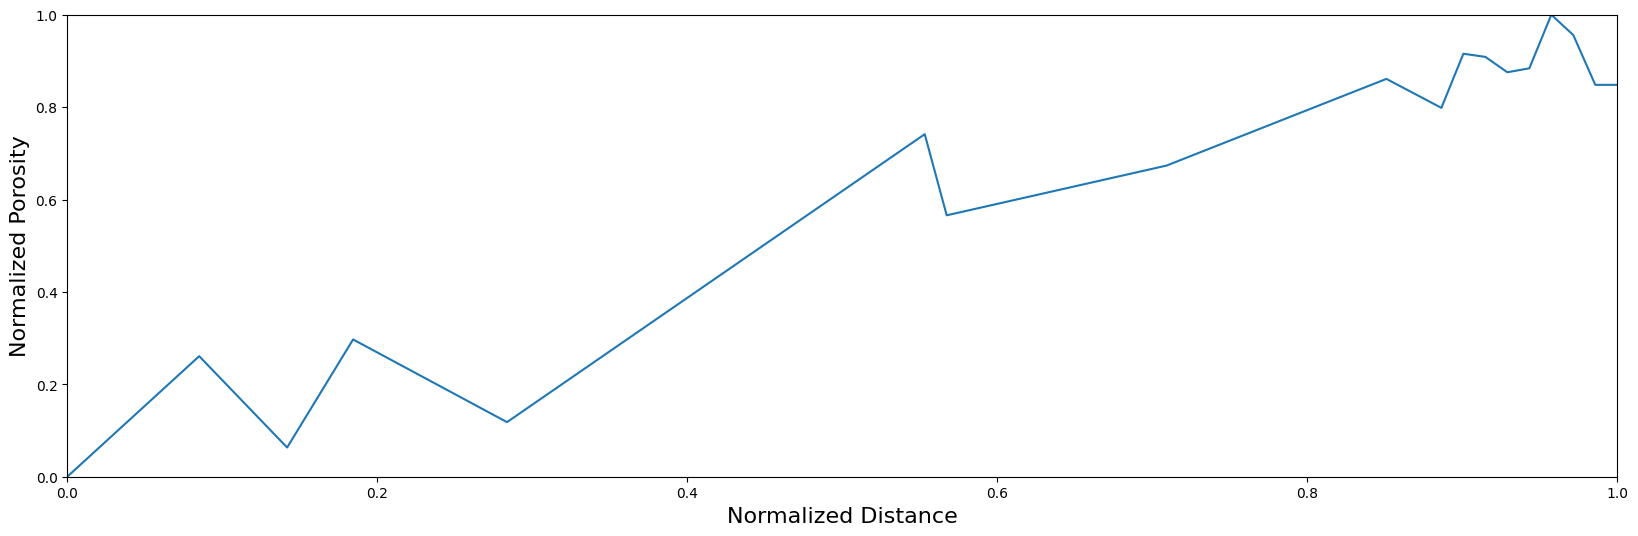

In [16]:
fig, ax = plt.subplots(1,1,figsize=(20,6));ax.plot(corr_df.X, corr_df.Porosity);ax.set_xlim(0,1); ax.set_ylim(0,1);
ax.set_xlabel("Normalized Distance", size=16);ax.set_ylabel("Normalized Porosity", size=16);

### Let's try to predict permeability from porosity

And let's ignore stationarity for now (at our peril!). We will do a geographic train-test-split, keeping <span style="color:blue">**30% of the data as a test set**</span>, and <span style="color:red">**70% as our train set**</span>:

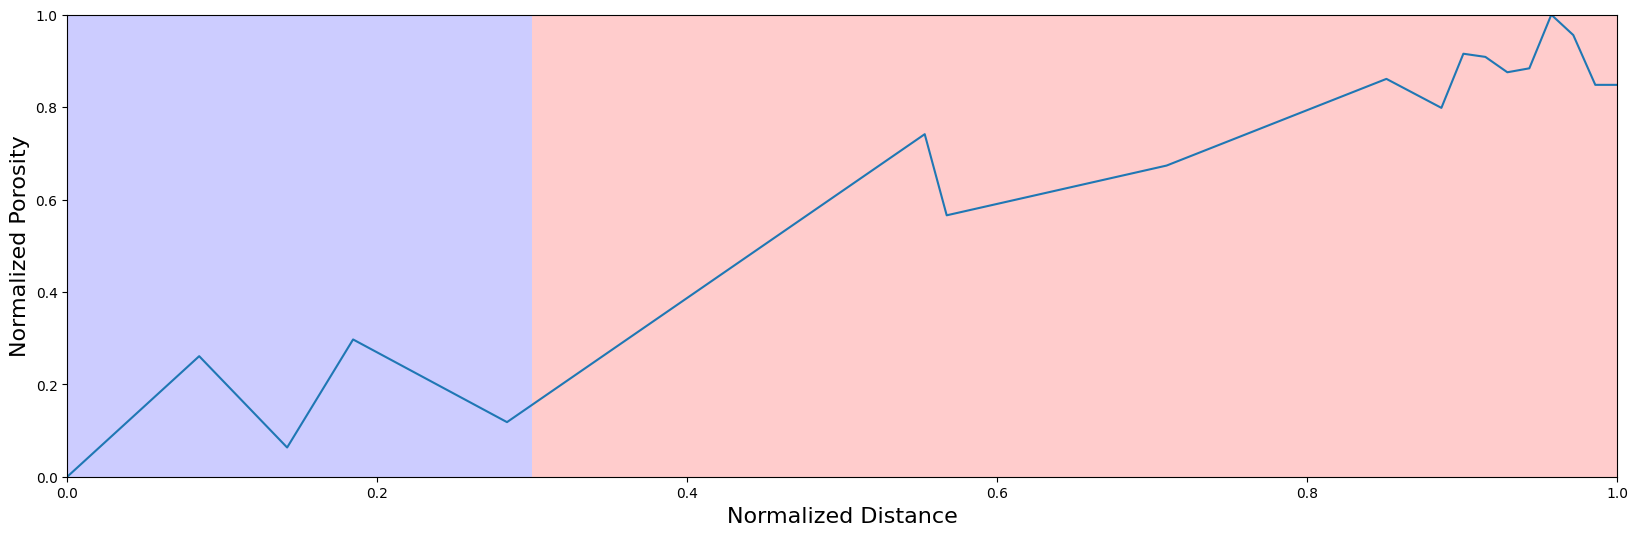

In [17]:
fig, ax = plt.subplots(1,1,figsize=(20,6));ax.plot(corr_df.X, corr_df.Porosity);ax.set_xlim(0,1); ax.set_ylim(0,1);
ax.set_xlabel("Normalized Distance", size=16);ax.set_ylabel("Normalized Porosity", size=16);
rect = patches.Rectangle((0, 0), .3, 1, linewidth=0, edgecolor='r', facecolor='blue', alpha=.2);ax.add_patch(rect);
rect = patches.Rectangle((.3, 0), 1, 1, linewidth=0, edgecolor='r', facecolor='red', alpha=.2);ax.add_patch(rect);

### Let's use a <code>KNNRegressor</code> for our prediction:

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
X_test_poro = corr_df.loc[:4,'Porosity']; y_test_poro = corr_df.loc[:4,'Perm'];
X_train_poro = corr_df.loc[5:,'Porosity']; y_train_poro = corr_df.loc[5:,'Perm'];
reg = KNeighborsRegressor().fit(X_train_poro.values.reshape(-1,1), y_train_poro)

#### Now let's estimate the error on the test set:

In [19]:
y_pred = reg.predict(X_test_poro.values.reshape(-1,1))
print(f'Relative error is {mean_squared_error(y_test_poro,y_pred)*100:.0f}% !!!!')


Relative error is 33% !!!!


### Let's plot our results to explore where the errors are

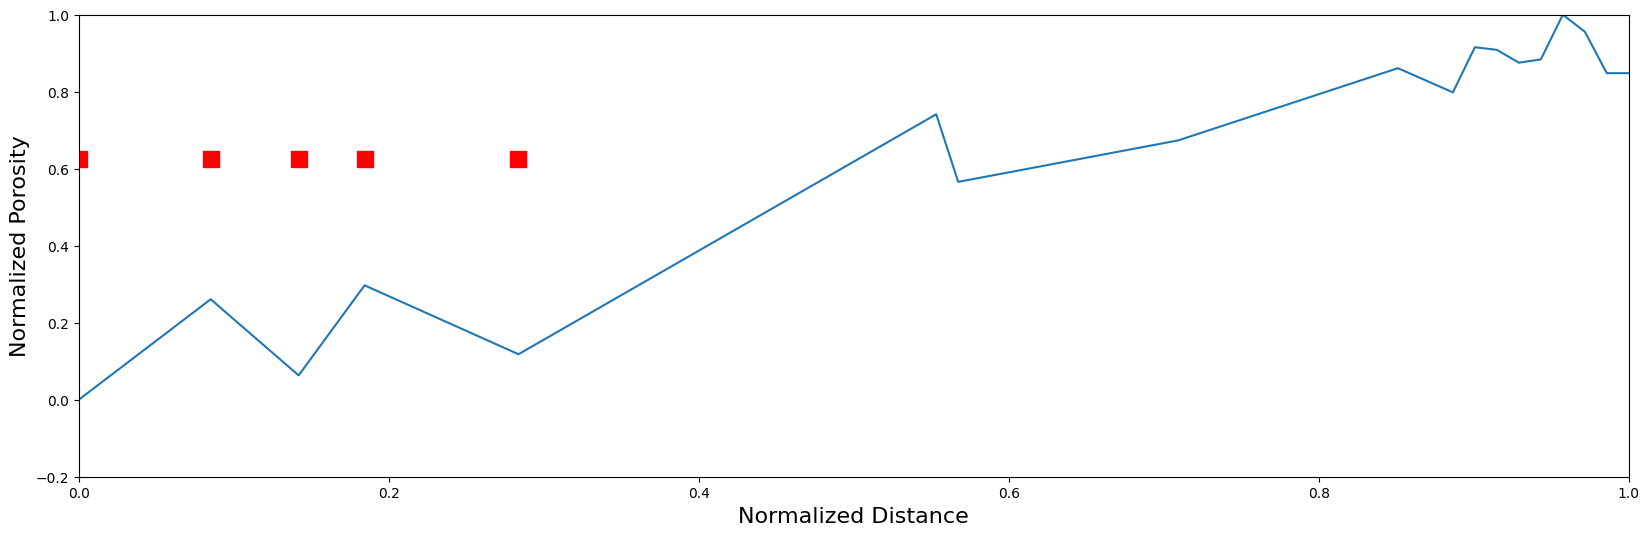

In [20]:
fig, ax = plt.subplots(1,1,figsize=(20,6));ax.plot(corr_df.X, corr_df.Porosity);ax.set_xlim(0,1); ax.set_ylim(-0.2,1);
ax.scatter(corr_df.loc[:4,'X'], y_pred, c='r', marker='s', s=120);
ax.set_xlabel("Normalized Distance", size=16);ax.set_ylabel("Normalized Porosity", size=16);

### Detrending data (introducing stationarity)

We can first remove trends in the data, for instance, using a simple linear regression with distance for our variables:

In [21]:
from sklearn.linear_model import LinearRegression

trend_poro = LinearRegression().fit(corr_df[['X']],corr_df.Porosity)
trend_perm = LinearRegression().fit(corr_df[['X']],corr_df.Perm)

In [22]:
# Detrend:
corr_df['Poro_det'] = corr_df.Porosity - trend_poro.predict(corr_df[['X']])
corr_df['Perm_det'] = corr_df.Perm - trend_perm.predict(corr_df[['X']])

#### Let's inspect the detrended porosity:

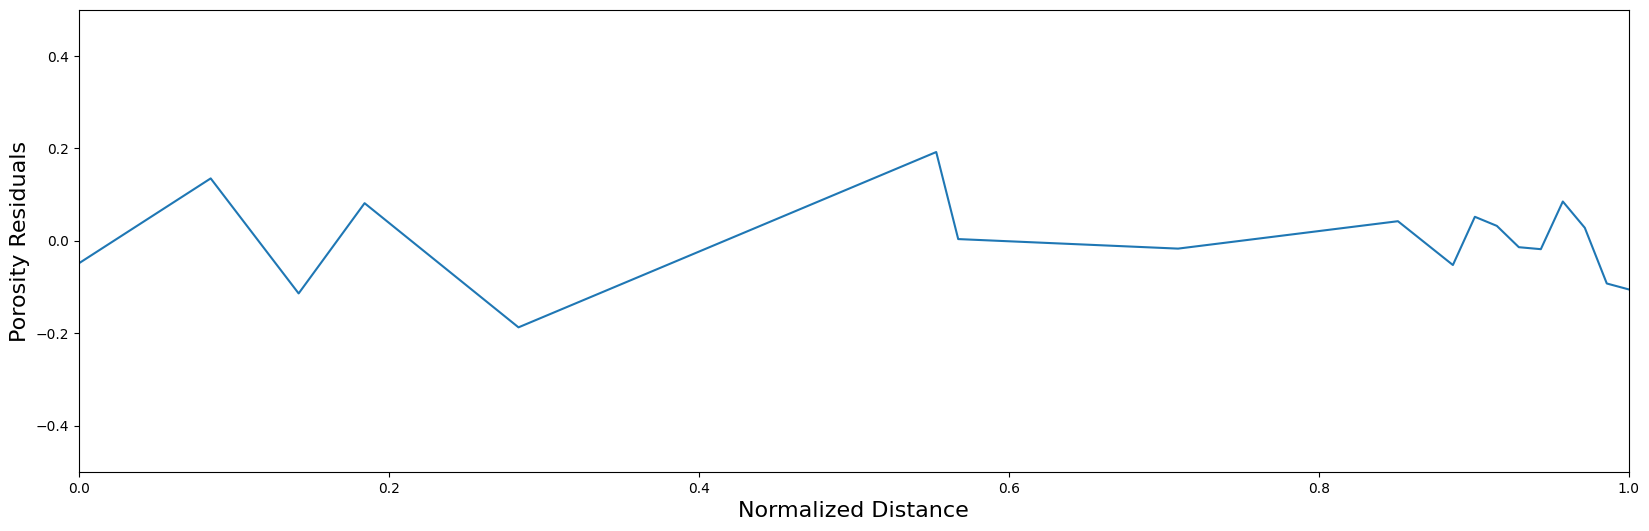

In [23]:
fig, ax = plt.subplots(1,1,figsize=(20,6))
ax.plot(corr_df.X, corr_df.Poro_det);ax.set_xlim(0,1); ax.set_ylim(-.5,.5);
ax.set_xlabel("Normalized Distance", size=16);ax.set_ylabel("Porosity Residuals", size=16);

👉 We can now model residuals without worrying about non-stationarity of the data

### Modeling detrended data (residuals):

In [25]:
# Train-test split:
X_test_poro = corr_df.loc[:4,'Poro_det']; y_test_poro = corr_df.loc[:4,'Perm_det'];
X_train_poro = corr_df.loc[4:,'Poro_det']; y_train_poro = corr_df.loc[4:,'Perm_det'];

# Model the residuals:
reg = KNeighborsRegressor().fit(X_train_poro.values.reshape(-1,1), y_train_poro)

# Print prediction error:
y_pred_det = reg.predict(X_test_poro.values.reshape(-1,1))
print(f'Relative error is {mean_squared_error(y_test_poro,y_pred_det)*100:.0f}% !!!!')

Relative error is 1% !!!!


##### We can add the trend to the residuals to obtain the true value:


In [26]:
trend_perm.coef_

array([0.71825015])

In [27]:
y_pred_best = y_pred_det + trend_perm.coef_[0] * corr_df.loc[:4,'X']  

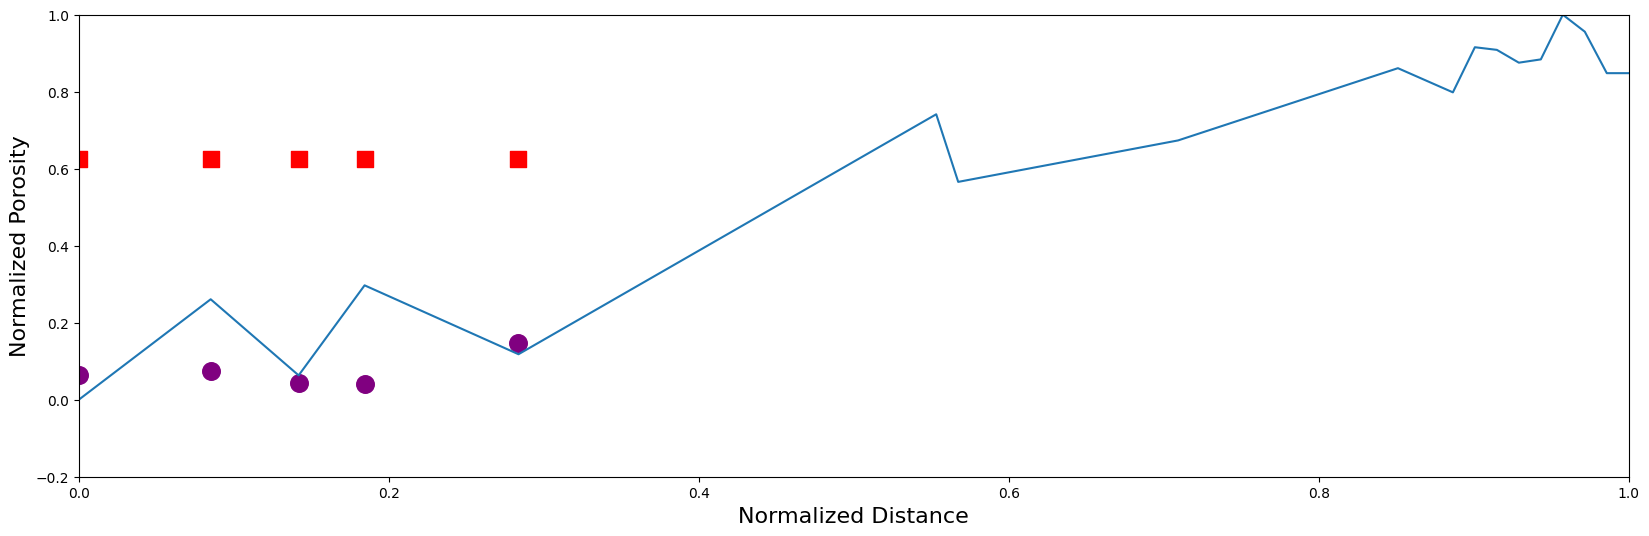

In [28]:
fig, ax = plt.subplots(1,1,figsize=(20,6));ax.plot(corr_df.X, corr_df.Porosity);ax.set_xlim(0,1); ax.set_ylim(-.2,1);
ax.scatter(corr_df.loc[:4,'X'], y_pred, c='r', marker='s', s=120);
ax.scatter(corr_df.loc[:4,'X'], y_pred_best, c='purple', marker='o', s=160);
ax.set_xlabel("Normalized Distance", size=16);ax.set_ylabel("Normalized Porosity", size=16);

### Modeling time series:

👉 **Same principle** as for spatial data: stationarity is a prerequisit

👉 Time Series need to be **detrended** (usually using a moving average)

👉 **Seasonality** (Short-term trends) also need to be removed to **model residuals**! This can be done with Python packages such as <code>statsmodel</a>

# Reducing Data Complexity through Feature Selection
<br>

<center><img src="https://drive.google.com/uc?id=13Geb28USIRLq2sFmsHhU3l8ms8wxnS4F" style="width:900px;">
 © Cédric John, 2022; Image generated with <a href="https://openai.com/blog/dall-e/">DALL-E</a>
<br>Prompt: <i>A cute furry squirel with soft brown eyes uses a ruler to measure the size of the African continent, digital art</i>.</center>

### Part of our Data Preparation Process
<br>


<img align="center" src="https://drive.google.com/uc?id=13UQX6gUFuqwGlBrTK8rTFySN8Dzg_LjQ" width="800px"/>

Feature selection is the process of eliminating non-informative features. 

### The curse of dimensionality
We need to observe enough data to support a meaningful relationship.
<img align="center" src="https://drive.google.com/uc?id=138tCcGljN4oICErIthNASNhZ9RhhMKUX" width="800px"/>
<a href="https://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/">Source</a>



<img align="center" src="https://drive.google.com/uc?id=13HaYr5DmSGaFJDUAzPICpcLawpT3Q0SK" width="1200px"/>
As the number of features or dimensions grows, the amount of data we need to generalise accurately grows **exponentially** e.g $5^1$, $5^2$, $5^3$, $5^n$
<a href="https://www.freecodecamp.org/news/the-curse-of-dimensionality-how-we-can-save-big-data-from-itself-d9fa0f872335/">Source</a>


## Feature correlation
One selection technique is to remove one (or more) of  features that are highly correlated to each other.
* High correlation = redundant information 

### 🖥 Pearson Correlation

In [29]:
corr_data = X_train.copy()
corr_data['target'] = y_train_cat
corr = corr_data.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,target
fixed acidity,1.000000,0.614502,0.177733,0.147127,-0.019355,-0.002593,-0.005842,-0.001739,-0.004577,0.110971,0.001877
volatile acidity,0.614502,1.000000,0.781334,0.291702,0.593807,-0.004581,-0.002736,-0.000150,-0.007708,0.642222,0.001274
citric acid,0.177733,0.781334,1.000000,0.341440,0.567457,0.000514,0.001655,-0.000736,-0.004747,0.328986,-0.001615
residual sugar,0.147127,0.291702,0.341440,1.000000,-0.361769,-0.000322,0.008254,-0.000056,-0.006143,0.028563,0.000044
chlorides,-0.019355,0.593807,0.567457,-0.361769,1.000000,-0.004556,-0.002102,0.000053,-0.001274,0.723878,0.000273
free sulfur dioxide,-0.002593,-0.004581,0.000514,-0.000322,-0.004556,1.000000,0.000270,0.007040,-0.001996,-0.008556,-0.001382
total sulfur dioxide,-0.005842,-0.002736,0.001655,0.008254,-0.002102,0.000270,1.000000,0.004157,0.002579,-0.001724,-0.003829
density,-0.001739,-0.000150,-0.000736,-0.000056,0.000053,0.007040,0.004157,1.000000,-0.002029,0.001578,-0.003616
sulphates,-0.004577,-0.007708,-0.004747,-0.006143,-0.001274,-0.001996,0.002579,-0.002029,1.000000,-0.005985,-0.000870
alcohol,0.110971,0.642222,0.328986,0.028563,0.723878,-0.008556,-0.001724,0.001578,-0.005985,1.000000,0.003142


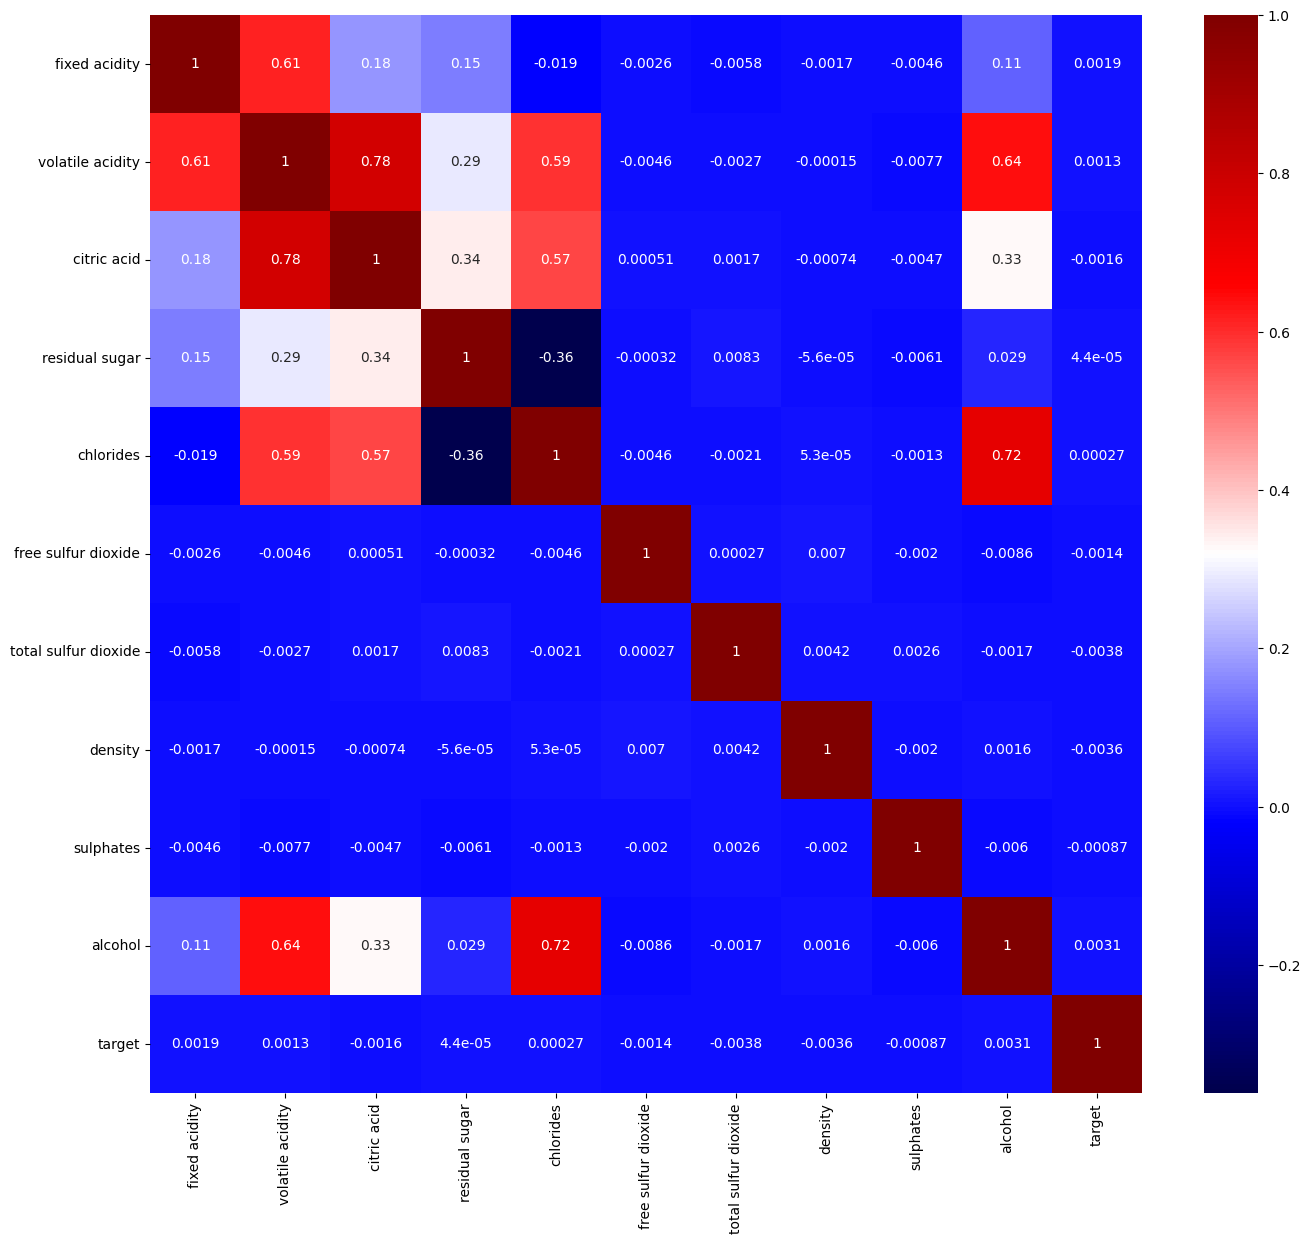

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(16,14))

# Heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "seismic",ax=ax, annot=corr);

# Feature Permutation 
Feature permutation is a second feature selection algorithm that evaluates the importance of each feature in predicting the target.
* Trains and records the test score of a base model containing all features 
* Randomly shuffles (permutation) <span style="color:blue">**one**</span> feature within the test set 
* Records new score on shuffled test set 
* Compares the new score to the original score 
* Repeat for each feature 
👉 <a href="https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html">Sklearn's <code>permutation_importance</code> documentation</a>


👉 If the score drops when a feature is shuffled, it is considered important.

### 💻 Feature permutation in Sklearn

This time, let's see if turning this problem into a classification problem works better:

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

model = LogisticRegression(max_iter=3000)

model.fit(X_train, y_train_cat)

LogisticRegression(max_iter=3000)

In [32]:
permutation_score = permutation_importance(model, X_train, y_train_cat, n_repeats=10) # Perform Permutation

In [33]:
import numpy as np
importance_df = pd.DataFrame(np.vstack((X_train.columns,
                                        permutation_score.importances_mean)).T) # Unstack results
importance_df.columns=['feature','score decrease']

importance_df.sort_values(by="score decrease", ascending = False) # Order by importance

,feature,score decrease
2,citric acid,0.22618
0,fixed acidity,0.064773
9,alcohol,0.012273
1,volatile acidity,0.006667
3,residual sugar,0.003279
4,chlorides,0.00057
6,total sulfur dioxide,0.000084
7,density,0.000054
5,free sulfur dioxide,-0.000037
8,sulphates,-0.000041


## Model with all features

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

base_model = LogisticRegression(max_iter=3000)

scores = cross_val_score(base_model, X_train, y_train_cat, cv=3)

scores.mean()

0.8602000127998988

## Model with best features

In [36]:
from sklearn.model_selection import cross_val_score

X_small = X_train[["citric acid","fixed acidity", "alcohol"]] # Keep strong features

final_model = LogisticRegression(max_iter=3000)

scores = cross_val_score(final_model, X_small, y_train_cat, cv=3)

scores.mean()

0.8591428579016801

## Training curve for model with all features

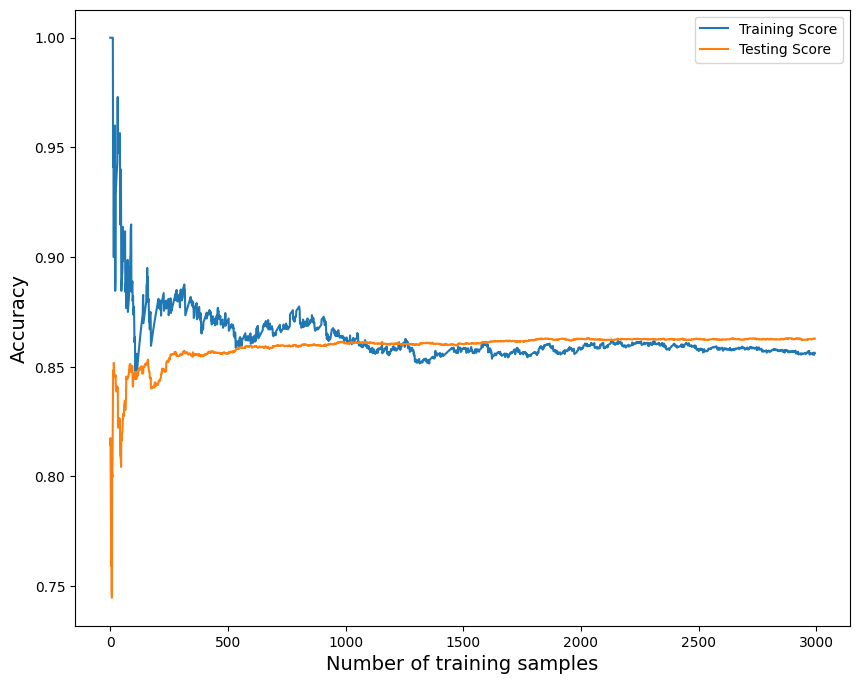

In [37]:
from sklearn.metrics import accuracy_score
val_score = []
train_score = []

fig, ax = plt.subplots(1,1, figsize=(10,8))

for nb_samples in range(5,3000):
    Xi = X_train[:nb_samples]
    yi = y_train_cat[:nb_samples]
    lr = LogisticRegression().fit(Xi, yi)
    y_pred = lr.predict(Xi)
    y_test_pred = lr.predict(X_test)

    train_score.append(accuracy_score(yi, y_pred))
    val_score.append(accuracy_score(y_test_cat, y_test_pred))
                     
ax.plot(train_score, label='Training Score')
ax.plot(val_score, label='Testing Score')
ax.set_xlabel('Number of training samples', size = 14)
ax.set_ylabel('Accuracy', size = 14)
ax.legend();

## Training curve for model with best features

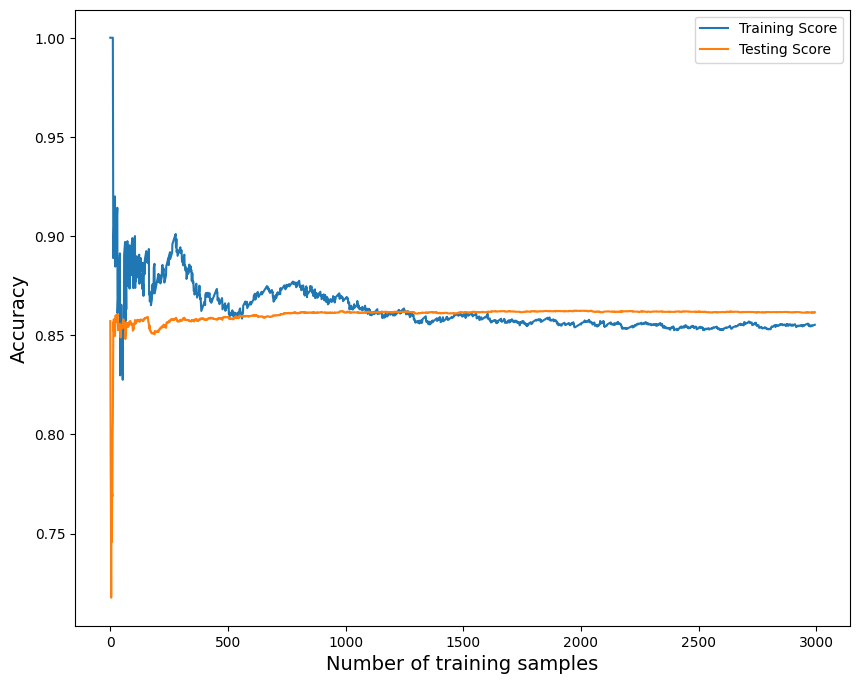

In [38]:
from sklearn.metrics import accuracy_score
val_score_small = []
train_score_small = []
X_test_small = X_test[["citric acid","fixed acidity", "alcohol"]] 

fig, ax = plt.subplots(1,1, figsize=(10,8))

for nb_samples in range(5,3000):
    Xi = X_small[:nb_samples]
    yi = y_train_cat[:nb_samples]
    lr = LogisticRegression().fit(Xi, yi)
    y_pred = lr.predict(Xi)
    y_test_pred = lr.predict(X_test_small)

    train_score_small.append(accuracy_score(yi, y_pred))
    val_score_small.append(accuracy_score(y_test_cat, y_test_pred))

ax.plot(train_score_small, label='Training Score')
ax.plot(val_score_small, label='Testing Score')
ax.set_xlabel('Number of training samples', size = 14)
ax.set_ylabel('Accuracy', size = 14)
ax.legend();

## Comparing validation scores

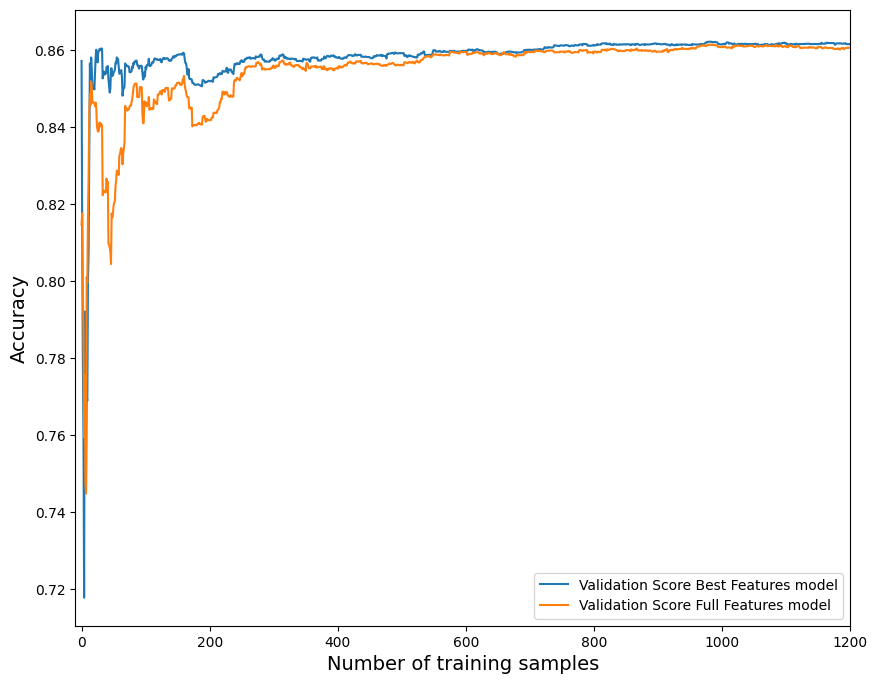

In [39]:
fig, ax = plt.subplots(1,1, figsize=(10,8))                 
ax.plot(val_score_small, label='Validation Score Best Features model')
ax.plot(val_score, label='Validation Score Full Features model')
ax.set_xlabel('Number of training samples', size = 14)
ax.set_ylabel('Accuracy', size = 14)
ax.set_xlim(-10,1200)
ax.legend();

### Reducing Complexity
The most simple solution is normally the best solution🔪 <br>
Reducing the number of features makes the model:
* More interpretable 
* Faster to train 
* Requires less samples (**4-5 times less in our example**)
* Easier to implement and maintain in production 

# Suggested Resources

## 📺 Videos 
* 📼 <a href="https://youtu.be/QGjdS1igq78">Machine-learning based modelling of spatial and spatio-temporal data (introduction)</a>, Lecture by Hanna Meyer, Prague Summer School, 2018

## 📚 Further Reading 
* 📖 <a href="https://kevinkotze.github.io/ts-6-unit-roots/">Non-stationarity</a> by Kevin Kotzé (a bit in depth but a lot of good references
* 📖 <a href="https://www.analyticsvidhya.com/blog/2021/03/introducing-machine-learning-for-spatial-data-analysis/#:~:text=Machine%20Learning%20for%20spatial%20data%20analysis%20builds%20a%20model%20to,the%20spatial%20attribute%20into%20account.">Introducing Machine Learning for Spatial Data Analysis</a> by Rendik, 2021
* 📖 <a href="https://link.springer.com/book/10.1007/0-387-35429-8">Statistical Analysis of Environmental Space-Time Processes (Book)</a> by Le and Zidek, 2006


## 💻🐍 Time to Code ! 